In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Dropout, Flatten, Dense 

In [3]:
df_train = pd.read_csv("../Datasets/fashion_mnist/fashion-mnist_train.csv")
df_test = pd.read_csv("../Datasets/fashion_mnist/fashion-mnist_test.csv")

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [5]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,...,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,227,211,171,191,236,228,172,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,108,242,253,0,112,255,217,211,227,245,195,194,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,136,153,168,252,174,136,166,130,123,131,66,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2,0,5,194,193,204,104,116,241,217,196,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,0,119,173,239,112,0,189,125,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,3,0,0,214,232,229,249,245,248,252,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [94]:
Xtrain = df_train.values[:, 1:]
Ytrain = df_train.values[:, 0]

Xtest = df_test.values[:, 1:]
Ytest = df_test.values[:, 0]

In [95]:
from math import sqrt

pxl = int(sqrt(Xtrain.shape[1]))
Xtrain = Xtrain.reshape((-1, pxl, pxl, 1))
Xtest = Xtest.reshape((-1, pxl, pxl, 1))

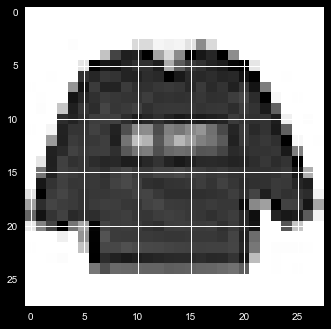

In [96]:
import matplotlib.pyplot as plt

plt.imshow(Xtrain[0])
plt.style.use("dark_background")
plt.show()

In [97]:
# data normalization
Xtrain = Xtrain/255.0
Xtest = Xtest/255.0

In [98]:
# convert labels into one-hot format
from keras.utils import np_utils

Ytrain = np_utils.to_categorical(Ytrain)
Ytest = np_utils.to_categorical(Ytest)

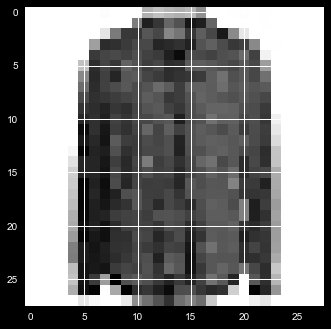

In [99]:
import matplotlib.pyplot as plt

plt.imshow(Xtrain[2])
plt.style.use("dark_background")
plt.show()

In [100]:
print(Xtrain.shape, Ytrain.shape)
print(Xtest.shape, Ytest.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


In [101]:
model = Sequential()
model.add(Conv2D(input_shape=(28, 28, 1), activation='relu', filters=56, kernel_size=(3, 3), use_bias=True))
model.add(MaxPool2D(pool_size=(2,2), strides=(2, 2)))
model.add(Conv2D(kernel_size=(3, 3), filters=28, activation='relu', use_bias=True))
model.add(Dropout(0.2))
model.add(MaxPool2D(pool_size=(4,4), strides=(1,1)))
model.add(Flatten())
model.add(Dense(45, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 56)        560       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 56)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 28)        14140     
                                                                 
 dropout_3 (Dropout)         (None, 11, 11, 28)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 28)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1792)            

In [102]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [103]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# early stop at validation accuracy
earlystop = EarlyStopping('val_accuracy', patience=2, mode='max')
# save model when validation accuracy increases
checkpoint = ModelCheckpoint('best-model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

hist = model.fit(Xtrain, Ytrain, 100, 20, validation_split=0.2, callbacks=[checkpoint, earlystop], use_multiprocessing=True)

Epoch 1/20
480/480 [==============================] - 20s 39ms/step - loss: 0.6472 - accuracy: 0.7706 - val_loss: 0.4575 - val_accuracy: 0.8424
Epoch 2/20
480/480 [==============================] - 52s 109ms/step - loss: 0.4157 - accuracy: 0.8507 - val_loss: 0.4066 - val_accuracy: 0.8574
Epoch 3/20
480/480 [==============================] - 18s 37ms/step - loss: 0.3631 - accuracy: 0.8666 - val_loss: 0.3500 - val_accuracy: 0.8780
Epoch 4/20
480/480 [==============================] - 18s 37ms/step - loss: 0.3314 - accuracy: 0.8780 - val_loss: 0.3343 - val_accuracy: 0.8852
Epoch 5/20
480/480 [==============================] - 17s 36ms/step - loss: 0.3084 - accuracy: 0.8874 - val_loss: 0.3340 - val_accuracy: 0.8823
Epoch 6/20
480/480 [==============================] - 17s 36ms/step - loss: 0.2903 - accuracy: 0.8934 - val_loss: 0.3004 - val_accuracy: 0.8953
Epoch 7/20
480/480 [==============================] - 17s 36ms/step - loss: 0.2783 - accuracy: 0.8979 - val_loss: 0.3091 - val_accuracy

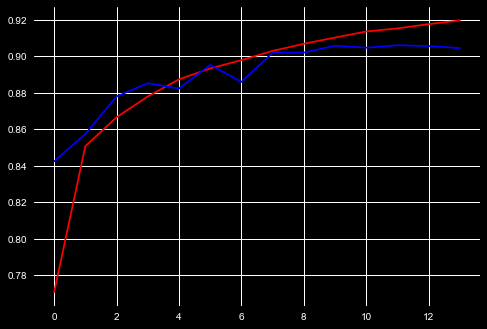

In [105]:
plt.plot(hist.history['accuracy'], c='r')
plt.plot(hist.history['val_accuracy'], c='b')
plt.show()

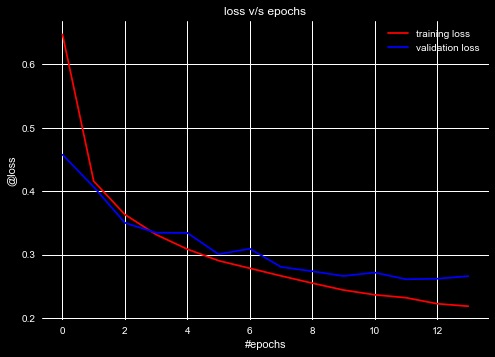

In [106]:
plt.plot(hist.history['loss'], c='r', label='training loss')
plt.plot(hist.history['val_loss'], c='b', label='validation loss')
plt.title('loss v/s epochs')
plt.xlabel('#epochs')
plt.ylabel('@loss')
plt.legend()
plt.show()

In [107]:
Ypred = model.predict(Xtest)

313/313 [==============================] - 4s 12ms/step


In [114]:
import numpy as np

np.sum(Ypred, axis=1)

array([1.        , 1.        , 1.0000001 , ..., 1.        , 0.99999994,
       0.99999994], dtype=float32)

In [118]:
Yp = np.argmax(Ypred, axis=1)

In [123]:
YT = np.argmax(Ytest, axis=1)

In [124]:
print(YT.shape, Yp.shape)

(10000,) (10000,)
